# Regular Expressions in Python

In [1]:
# Python has a built-in package called re, and makes regular expressions easy to use.

import nltk
from nltk import re

text = "Mary is at home"
re.findall("Mary",text)

['Mary']

In [2]:
# Regular expressions are very powerful, let's see an example. 
# Let's search the string to see if it starts with "Mary" and ends with "home".

text = "Mary is at home"
re.search("^Mary.*home$", text)

<re.Match object; span=(0, 15), match='Mary is at home'>

In [3]:
# Tokenisation is provided by NLTK, although we can still use regex to split at each white-space character:

re.split("\s", "Mary is at home")

['Mary', 'is', 'at', 'home']

In [4]:
# We can also replace white space characters with another character or number, for different tasks:
# When you see "%20," it represents a space in an encoded URL.
# The following code replaces a space with the "%20".

text = "Mary is at home"
re.sub("\s", "%20", text)

'Mary%20is%20at%20home'

In [5]:
# Let's see a more detailed example where we can extract a URL from a given text:

import re
text = """Web browsers request pages from web servers by using a URL. 
          The URL is the address of a web page, like: https://www.w3schools.com."""
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',text)
print("Original string: ", text)
print("Urls: ", urls)

Original string:  Web browsers request pages from web servers by using a URL. 
          The URL is the address of a web page, like: https://www.w3schools.com.
Urls:  ['https://www.w3schools.com.']


### NLP Visualisations

In [6]:
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\mohit\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


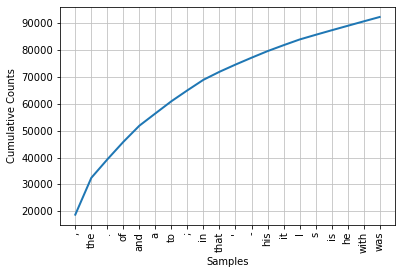

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [8]:
fdist1 = FreqDist(text1)
fdist1.plot(20, cumulative=True)

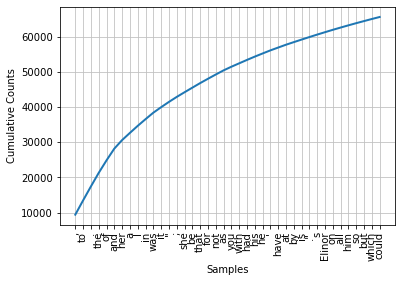

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [9]:
fdist1 = FreqDist(text2)
fdist1.plot(40, cumulative=True)

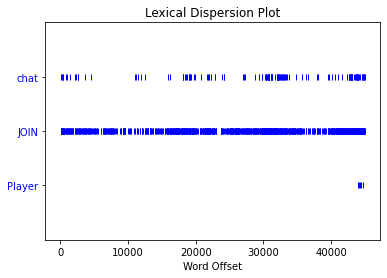

In [10]:
text5.dispersion_plot(["chat","JOIN","Player"])

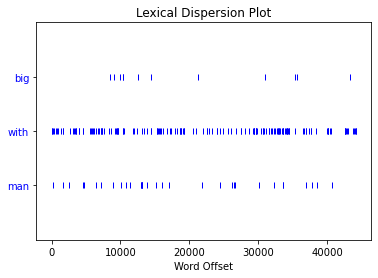

In [11]:
text5.dispersion_plot(["big","with","man"])

# Word Vectors

In [12]:
import numpy as np
import spacy
from sklearn.decomposition import PCA
nlp = spacy.load("en")
animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"
animal_tokens = nlp(animals)
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

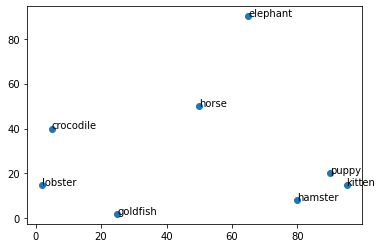

In [13]:
# Let us assume that we preprocessed the data and we prepare it for rendering

import matplotlib.pyplot as plt

x = [95,80,90,2,65,5,50,25]
y = [15,8,20,15,90,40,50,2]
labels = ['kitten','hamster','puppy','lobster','elephant','crocodile','horse','goldfish']
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

### Chunking

In [14]:
sentence = [("the", "DT"), ("little","JJ"), ("white", "JJ"), ("ball", "NN"), ("fall","VBD"), ("in", "IN"), ("the", "DT"), ("lake", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)

(S
  (NP the/DT little/JJ white/JJ ball/NN)
  fall/VBD
  in/IN
  (NP the/DT lake/NN))


### Tagging

In [15]:
# Tagging: A part-of-speech tagger, or POS-tagger, processes a sequence of words, 
# and attaches a part of speech tag to each word.

import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
text = word_tokenize("New York City is the most populous city in the United States.")
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('New', 'NNP'),
 ('York', 'NNP'),
 ('City', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('populous', 'JJ'),
 ('city', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('.', '.')]

In [16]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [17]:
# Let's see an example of bigram generation using the NLTK library.

import nltk
list(nltk.bigrams(['more','is','said','than','done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [18]:
# The collocations() method will present us a list of the most common collocations of text4: Inaugural Address Corpus.

import nltk
nltk.download().text4.collocations()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


AttributeError: 'bool' object has no attribute 'text4'

# Module 3 Exercises

**Task 1:** Use the following x,y, and label lists to plot a diagram that represents the word vectors. You are advised to use the pyplot method.

x = [95,80,90,2,65,5,50,25], y = [15,8,20,15,90,40,50,2], labels = ['kitten','hamster','puppy','lobster','elephant','crocodile','horse','goldfish']

In [ ]:
import matplotlib.pyplot as plt

x = [95,80,90,2,65,5,50,25]
y = [15,8,20,15,90,40,50,2]
labels = ['kitten','hamster','puppy','lobster','elephant','crocodile','horse','goldfish']

fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

**Task 2:** Use the NLTK POs tagger to print the NER of the following text. You are advised to use the pos_tag method.

text = "New York City is the most populous city in the United States."

In [ ]:
import nltk
nltk.download('averaged_perception_tagger')
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
text = word_tokenize("New York City is the most populous city in the United States.")
nltk.pos_tag(text)

**Task 3:** Print the bigrams of the following text.

text = "NLTK is an awesome library"

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
text = word_tokenize("NLTK is an awesome library")
list(nltk.bigrams(text))

In [ ]:
import nltk

test = "NLTK is an awesome library"

list(nltk.bigrams(text.split()))

**Task 4:** Find the synonym of the word *cat* using the WordNet corpus and its *synset* library.

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
wn.synsets('cat')

**Task 5:** Transform the following text into the following format.

text = "Mary is at home" to Mary-is-at-home.

In [ ]:
import re
text = "Mary is at home"
re.sub("\s", "-", text)